In [1]:
import numpy as np
import pandas as pd
from PIL import Image


In [6]:
df_can = pd.read_excel(
    'https://github.com/ardhiraka/PFDS_sources/blob/master/Canada.xlsx?raw=true',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2,
)
df_can.head()
df_can.shape


(195, 43)

In [8]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.rename(columns={ 'OdName': 'Country', 'AreaName': 'Continent', 'RegName': 'Region'}, inplace=True)

df_can.columns = list(map(str, df_can.columns))

df_can.set_index('Country', inplace=True)

df_can['Total'] = df_can.sum(axis=1)

years = list(map(str, range(1980, 2014)))

df_can.head()

/var/folders/f6/vv8l9jts0zz7cnrmf10m9l2r0000gn/T/ipykernel_8198/4009737817.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_can['Total'] = df_can.sum(axis=1)


,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [9]:
df_can.describe

<bound method NDFrame.describe of                Continent              Region             DevName  1980  1981  \
Country                                                                        
Afghanistan         Asia       Southern Asia  Developing regions    16    39   
Albania           Europe     Southern Europe   Developed regions     1     0   
Algeria           Africa     Northern Africa  Developing regions    80    67   
American Samoa   Oceania           Polynesia  Developing regions     0     1   
Andorra           Europe     Southern Europe   Developed regions     0     0   
...                  ...                 ...                 ...   ...   ...   
Viet Nam            Asia  South-Eastern Asia  Developing regions  1191  1829   
Western Sahara    Africa     Northern Africa  Developing regions     0     0   
Yemen               Asia        Western Asia  Developing regions     1     2   
Zambia            Africa      Eastern Africa  Developing regions    11    17   
Zimbab

In [10]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.patches as mpatches
mpl.style.use('ggplot')

Unable to revert mtime: /Library/Fonts
Fontconfig warning: ignoring UTF-8: not a valid region tag


In [11]:
# Waffle Charts 

df_dsn = df_can.loc[['Denmark', 'Sweden', 'Norway']]

df_dsn

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327


In [14]:
# Step 1
# Menentukan Total dari kategori / 3 negara

total_values = sum(df_dsn['Total'])
total_values

df_dsn['Total'][0]

category_proportions = [float(value / total_values) for value in df_dsn['Total']]

category_proportions

[0.32255663965602777, 0.48503390110798744, 0.1924094592359848]

In [15]:
# step 2
# Ukuran waffle chart

width = 50
height = 10

total_num_tiles = width * height

total_num_tiles

500

In [16]:
# Step 3 
# Menghitung bar di tiap negara
tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

print(tiles_per_category)

[161, 243, 96]


In [18]:
# Step 4 membuat matrix
waffle_chart = np.zeros((height, width))
# len(waffle_chart)

category_index = 0
tile_index = 0

for col in range(width):
    for row in range(height):
        tile_index += 1
        # waffle_chart[row, col] = category_index
        if tile_index > sum(tiles_per_category[0:category_index]):
            category_index += 1
        waffle_chart[row, col] = category_index

waffle_chart


array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
        3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
        3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
        3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
        2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3.,
        3., 3.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 

<Figure size 432x288 with 0 Axes>

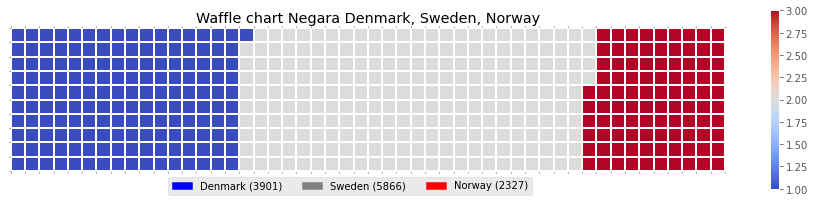

In [28]:
# Step 5 Visualkan matrix kamu
fig = plt.figure()
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.title('Waffle chart Negara Denmark, Sweden, Norway')
ax = plt.gca()

ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
ax.set_yticks(np.arange(-.5, (height), 1), minor=True)

ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

plt.xticks([])
plt.yticks([])


# Step 6 Tambah Legenda

values_cumsum = np.cumsum(df_dsn['Total'])
total_values = values_cumsum[len(values_cumsum) -1]

legend_handles = []
colors = ['blue', 'gray', 'red']
for i, category in enumerate(df_dsn.index.values):
    label_str = category + ' (' + str(df_dsn['Total'][i]) + ')'
    color_val = colormap(float(values_cumsum[i])/total_values)
    
    legend_handles.append(mpatches.Patch(color=colors[i], label=label_str))
plt.legend(handles=legend_handles, loc='lower center', ncol=len(df_dsn.index.values), bbox_to_anchor=(0., -0.2, 0.95, .1))

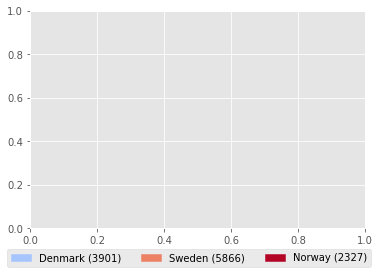

In [36]:
df_wza = df_can.loc[['Western Sahara', 'Zimbabwe', 'Afghanistan']]

Total number of tiles is 2000
Western Sahara: 0
Zimbabwe: 256
Afghanistan: 1744


<Figure size 432x288 with 0 Axes>

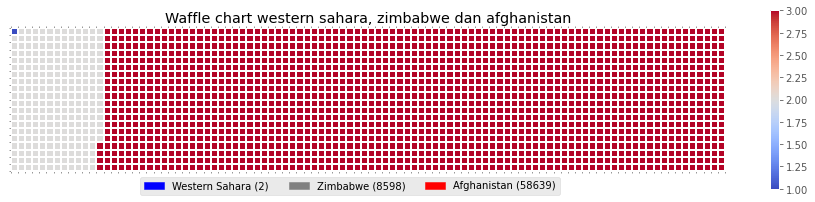

In [39]:
# Step 7 Wrap to function

def create_waffle_chart(categories, values, height, width, colormap, value_sign='', title='', colors=[]):
    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute tht total number of tiles
    total_num_tiles = width * height # total number of tiles
    print('Total number of tiles is', total_num_tiles)
    # Compute the number of tiles for each category
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print(categories[i] + ': ' + str(tiles))
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))
    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1
            # if the number of tiles populated for the current category
            # is equal to its corresponding allocated tiles
            if tile_index > sum(tiles_per_category[0: category_index]):
                # ... proceed to the next category
                category_index += 1
            # Set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    # instantiate a new figure object
    fig = plt.figure()
    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    plt.title(title)
    ax = plt.gca()
    # set minor ticks by axis
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    # add gridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cummulative sum of individual categories to match color schemes between chart and legend 
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) -1]

    # create_legend
    legend_handles = []
    for i, category in enumerate(categories):
        label_str = category + ' (' + str(values[i]) + ')'
        color_val = colors[i]
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))
    # add legend
    plt.legend(handles=legend_handles, loc='lower center', ncol=len(categories), bbox_to_anchor=(0., -0.2, 0.95, .1))

width = 100
height = 20

categories = df_wza.index.values
values = df_wza['Total']
colormap = plt.cm.coolwarm

create_waffle_chart(categories, values, height, width, colormap, '', 'Waffle chart western sahara, zimbabwe dan afghanistan', ['Blue', 'Gray', 'Red'])

In [ ]:
!python3 -m pip install pywaffle

In [41]:
# !python3 -m pip install wordcloud

import wordcloud



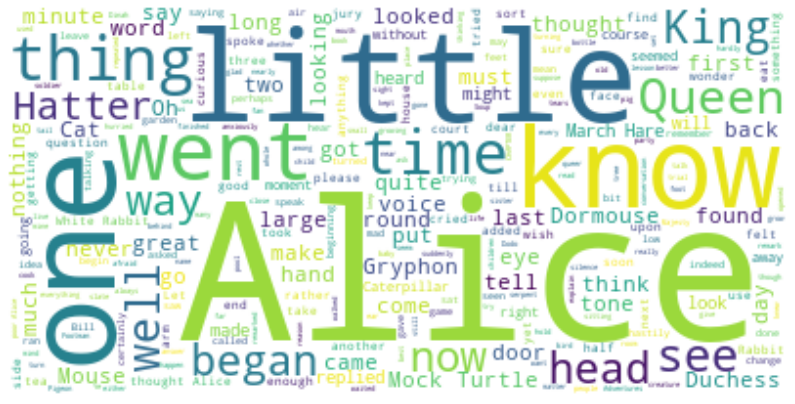

In [47]:
from wordcloud import WordCloud, STOPWORDS

!wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/alice_novel.txt -O alice_novel.txt
alice_novel = open('./alice_novel.txt', 'r').read()


# alice_novel
# unique stopwords
stopwords = set(STOPWORDS)
stopwords.add('said')

alice_wc = WordCloud(
    background_color='white',
    max_words=2000,
    stopwords=stopwords,
)

alice_wc.generate(alice_novel)

# # # Visualize most words from 2000

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)
plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

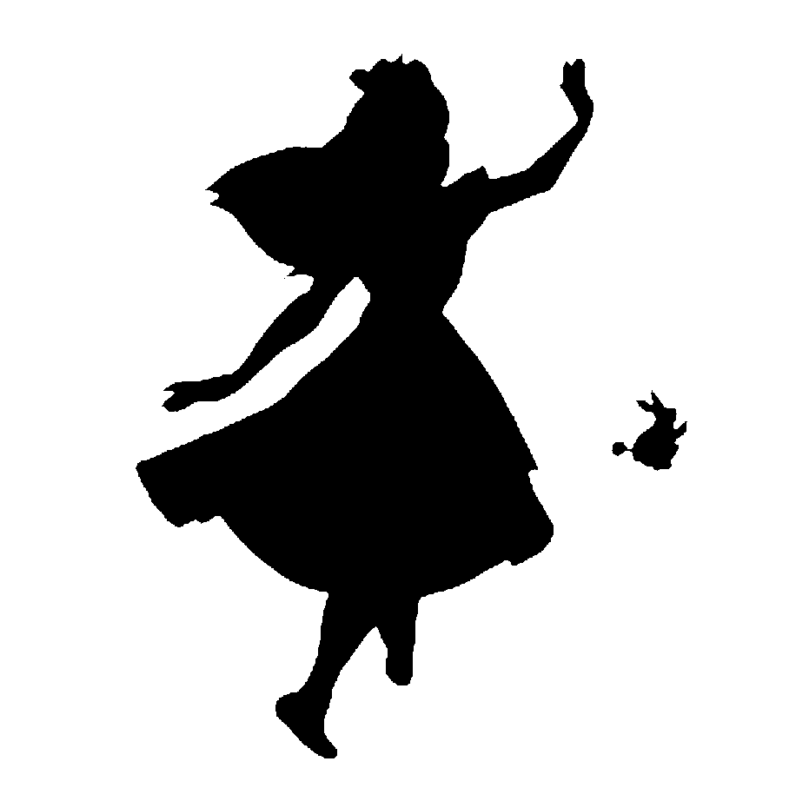

In [48]:
!wget --quiet https://github.com/ardhiraka/PFDS_sources/raw/master/alice_mask.png -O alice_mask.png

alice_mask = np.array(Image.open('./alice_mask.png'))

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_mask, cmap=plt.cm.gray, interpolation='bilinear')
plt.axis('off')
plt.show()

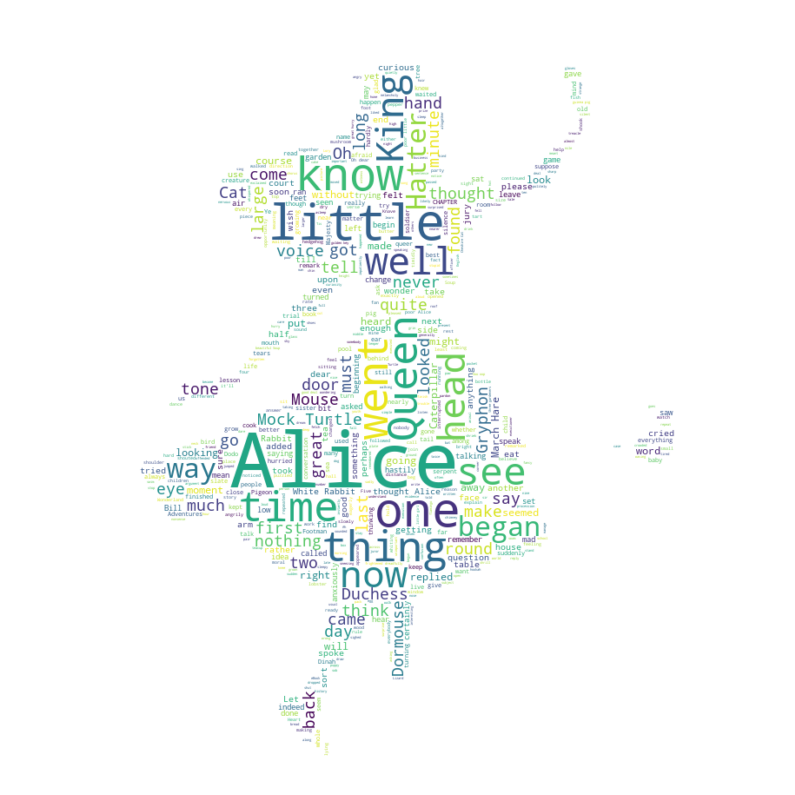

In [49]:
# instantiate a word cloud object
alice_wc = WordCloud(background_color='white', max_words=2000, mask=alice_mask, stopwords=stopwords)

alice_wc.generate(alice_novel)

fig = plt.figure()
fig.set_figwidth(14)
fig.set_figheight(18)

plt.imshow(alice_wc, interpolation='bilinear')
plt.axis('off')
plt.show()

In [50]:
!python3 -m pip install seaborn

import seaborn as sns

In [55]:

years = list(map(str, range(1980, 2014)))
years
# Jumlahkan total immigrant dari tiap taun
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
# df_tot.index

df_tot.index = map(float, df_tot.index)
df_tot.index
df_tot.reset_index(inplace=True)
df_tot.index
df_tot.columns = ['year', 'total']

df_tot

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417
5,1985.0,69978
6,1986.0,86048
7,1987.0,134771
8,1988.0,139306
9,1989.0,164432


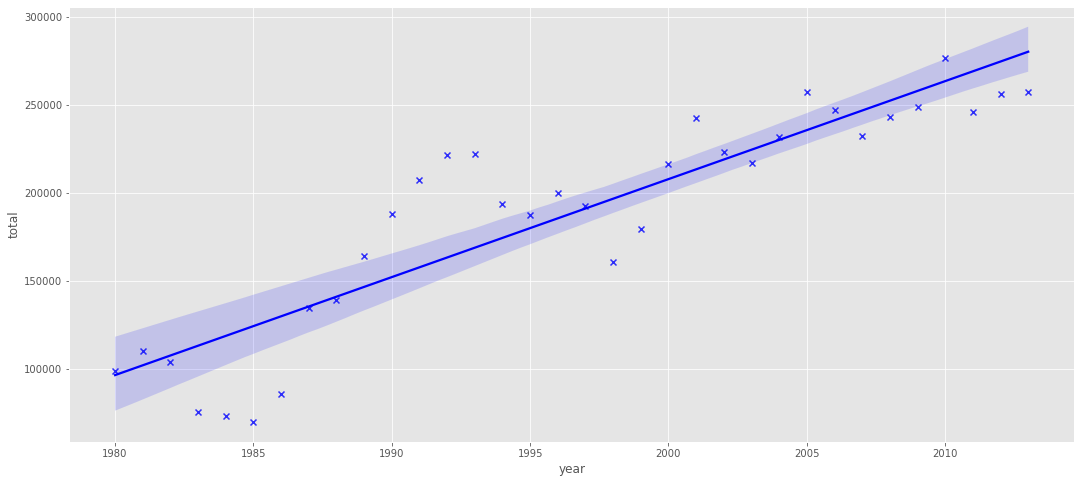

In [60]:
# Regplot Seaborn
figure, axis = plt.subplots(figsize=(18, 8))
axis
ax = sns.regplot(x='year', y='total', data=df_tot, color='blue', marker='x', ax=axis)

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

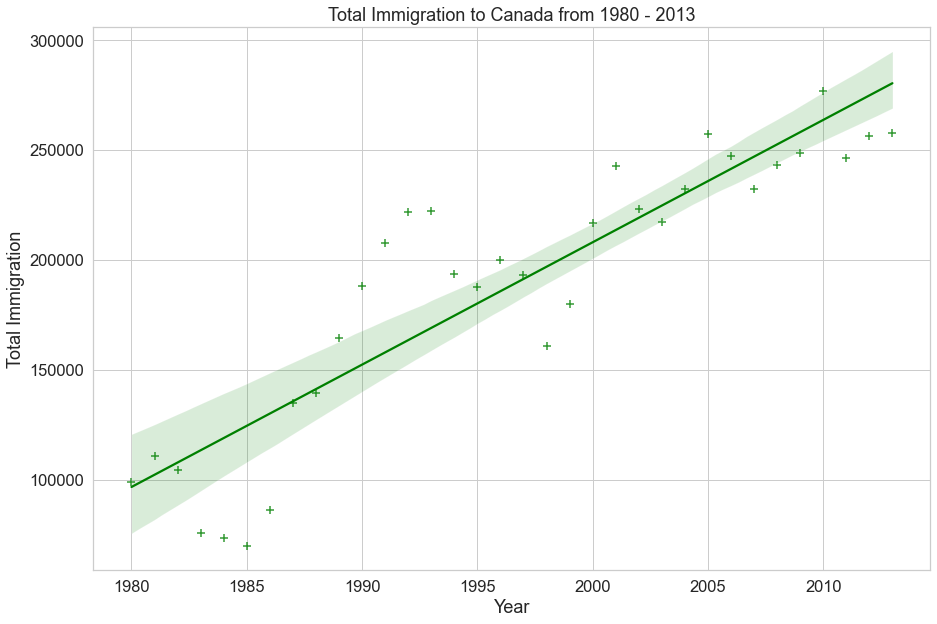

In [62]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
ax=sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 80 })
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

Text(0.5, 1.0, 'Total Immigration to Canada from 1980 - 2013')

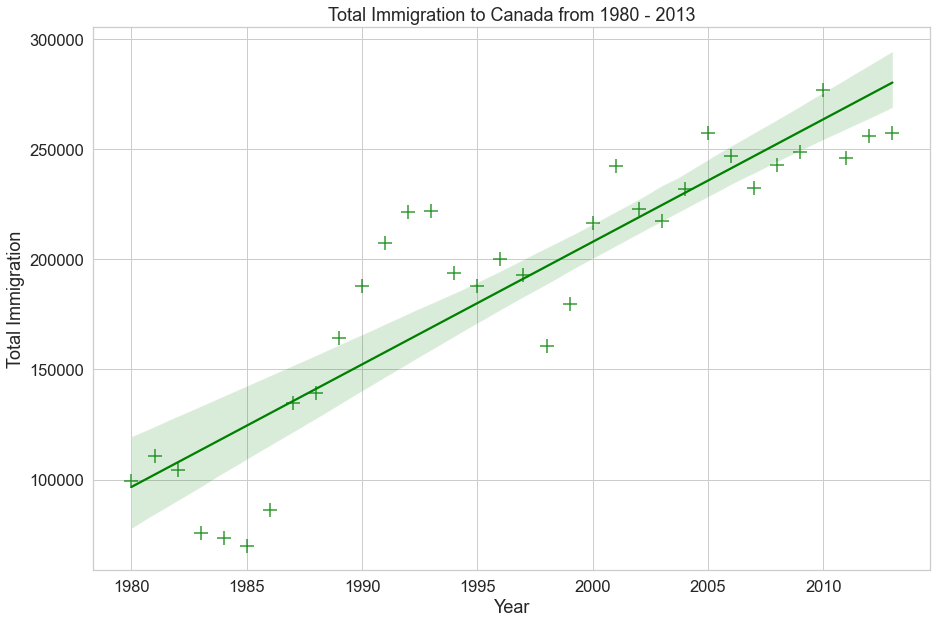

In [63]:
plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
ax=sns.regplot(x='year', y='total', data=df_tot, color='green', marker='+', scatter_kws={'s': 200 })
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration to Canada from 1980 - 2013')

<AxesSubplot:title={'center':'Total Immigration from Denmark, Sweden, and Norway to Canada from 1980 - 2013'}, xlabel='Year', ylabel='Total Immigration'>

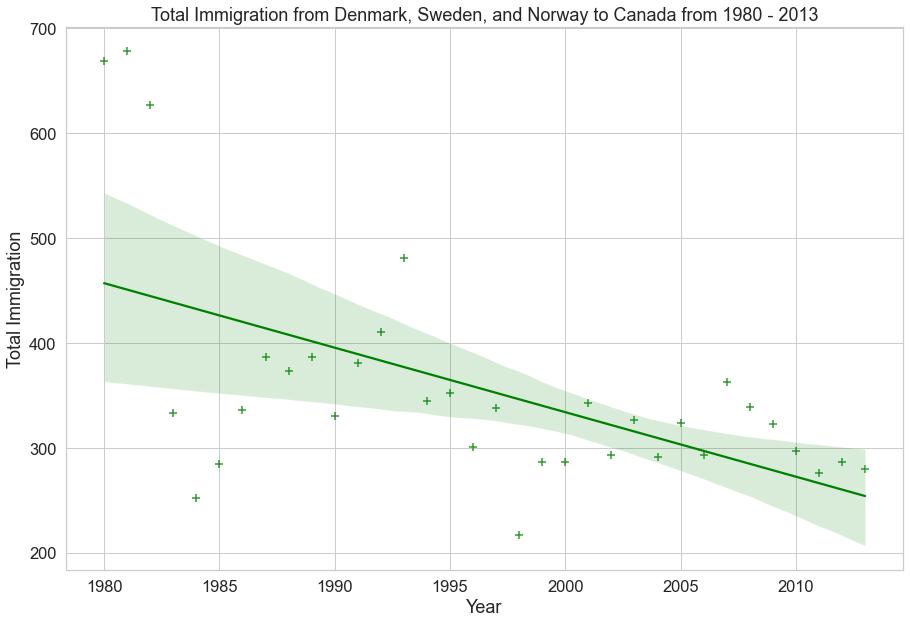

In [68]:
# Visualize Regplot data 3 countries
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_countries

df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total
df_total.reset_index(inplace=True)
df_total.columns = ['year', 'total']
df_total['year'] = df_total['year'].astype(int)

plt.figure(figsize=(15, 10))
sns.set(font_scale=1.5)
sns.set_style('whitegrid')
ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={ 's': 80 })
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigration from Denmark, Sweden, and Norway to Canada from 1980 - 2013')
ax

In [73]:
# !python3 -m pip install folium

import folium

# dir(folium)
help(folium.Map)


# world_map = folium.Map()

# world_map

Help on class Map in module folium.folium:

class Map(folium.elements.JSCSSMixin, branca.element.MacroElement)
 |  Map(location=None, width='100%', height='100%', left='0%', top='0%', position='relative', tiles='OpenStreetMap', attr=None, min_zoom=0, max_zoom=18, zoom_start=10, min_lat=-90, max_lat=90, min_lon=-180, max_lon=180, max_bounds=False, crs='EPSG3857', control_scale=False, prefer_canvas=False, no_touch=False, disable_3d=False, png_enabled=False, zoom_control=True, **kwargs)
 |  
 |  Create a Map with Folium and Leaflet.js
 |  
 |  Generate a base map of given width and height with either default
 |  tilesets or a custom tileset URL. The following tilesets are built-in
 |  to Folium. Pass any of the following to the "tiles" keyword:
 |  
 |      - "OpenStreetMap"
 |      - "Mapbox Bright" (Limited levels of zoom for free tiles)
 |      - "Mapbox Control Room" (Limited levels of zoom for free tiles)
 |      - "Stamen" (Terrain, Toner, and Watercolor)
 |      - "Cloudmade" (Must

In [75]:
world_map = folium.Map(location=[-6.992620, 110.428009], zoom_start=8)

# HACKTIV8
world_map = folium.Map(location=[-6.2607187, 106.7794275], zoom_start=15)

world_map

In [77]:
# A Stamen Toner Maps
world_map = folium.Map(location=[-6.9902851, 110.4207485], zoom_start=13, tiles='Stamen Terrain')
world_map

In [79]:
# B. Stamen Terrain Maps
world_map = folium.Map(location=[-6.9902851, 110.4207485], zoom_start=13, tiles='Mapbox Bright')
world_map

ValueError: Built-in templates for Mapbox and Cloudmade have been removed. You can still use these providers by passing a URL to the `tiles` argument. See the documentation of the `TileLayer` class.

In [81]:
# df_incidents = pd.read_csv('https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/Police_Department_Incidents_-_Previous_Year__2016_.csv')
# df_incidents.head()
df_incidents.columns

Index(['IncidntNum', 'Category', 'Descript', 'DayOfWeek', 'Date', 'Time',
       'PdDistrict', 'Resolution', 'Address', 'X', 'Y', 'Location', 'PdId'],
      dtype='object')

In [83]:
# df_incidents.
df_incidents100 = df_incidents.iloc[:100, :]
df_incidents100.head
# df_incidents100.columns

<bound method NDFrame.head of     IncidntNum        Category  \
0    120058272     WEAPON LAWS   
1    120058272     WEAPON LAWS   
2    141059263        WARRANTS   
3    160013662    NON-CRIMINAL   
4    160002740    NON-CRIMINAL   
..         ...             ...   
95   160014858  OTHER OFFENSES   
96   160015163    NON-CRIMINAL   
97   160015276        BURGLARY   
98   160015276   LARCENY/THEFT   
99   160015282   LARCENY/THEFT   

                                             Descript  DayOfWeek  \
0                           POSS OF PROHIBITED WEAPON     Friday   
1      FIREARM, LOADED, IN VEHICLE, POSSESSION OR USE     Friday   
2                                      WARRANT ARREST     Monday   
3                                       LOST PROPERTY    Tuesday   
4                                       LOST PROPERTY     Friday   
..                                                ...        ...   
95  FRAUDULENT GAME OR TRICK, OBTAINING MONEY OR P...  Wednesday   
96               

In [93]:
latitude = 37.77
longitude = -122.42

sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=13)
sanfran_map

In [86]:
incidents = folium.map.FeatureGroup()

for lat, lng in zip(df_incidents100.Y, df_incidents100.X):
    incidents.add_child(
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
        )
    )

sanfran_map.add_child(incidents)

In [89]:
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

for lat, lng, label, descrip in zip(df_incidents100.Y, df_incidents100.X, df_incidents100.Category, df_incidents100.Descript):
        popup_message = 'Kategori: ' + label + ' ' + 'Deskripsi: ' + descrip
        folium.CircleMarker(
            [lat, lng],
            radius=5,
            color='yellow',
            fill=True,
            popup=popup_message,
            fill_color='blue',
            fill_opacity=0.6,
        ).add_to(sanfran_map)

sanfran_map

In [94]:
incidents = folium.map.FeatureGroup()

for lat, lng, label in zip(df_incidents100.Y, df_incidents100.X, df_incidents100.Category):
    folium.Marker([lat, lng], popup=label).add_to(sanfran_map)

sanfran_map.add_child(incidents)

In [ ]:
# Add Cluster
from folium import plugins

# Generate
sanfran_map = folium.Map(location=[latitude, longitude], zoom_start=12)

# Generate wadah buat marker cluster
incidents=plugins.MarkerCluster().add_to(sanfran_map)

for lat, lng, label in zip(df_incidents100.Y, df_incidents100.X, df_incidents100.Category):
    folium.Marker(
        location=[lat, lng],
        icon=None,
        popup=label,
    ).add_to(incidents)

sanfran_map

In [ ]:
# !wget --quiet https://raw.githubusercontent.com/ardhiraka/PFDS_sources/master/world_countries.json


# df_can.reset_index(inplace=True)
# df_can.head()
world_geo = r'world_countries.json'

world_map = folium.Map(location=[0, 0], zoom_start=2, tiles='Mapbox Bright')
world_map.choropleth(
    geo_data=world_geo,
    data=df_can,
    columns=['Country', 'Total'],
    key_on='feature.properties.name',
    fill_color='YlOrRd', # Yellow Orange Red
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Immigration to Canada'
)
world_map